# Visualisations

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger
from torch_geometric.data import Batch
import pandas as pd
import numpy as np
import atlasify as atl

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"
input_dir = "csv"

/global/homes/d/danieltm/.conda/envs/gnn4itk-test/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Track Eff Performance

In [100]:
# Function for getting the bin limits
def get_bin_limits(data):
    x_bin_limits = data["num_tracks"].values
    return np.append(1, x_bin_limits)

# Function for getting the bin centers
def get_bin_centers(x_bin_limits):
    return (x_bin_limits[1:] + x_bin_limits[:-1])/2

# Function for getting the error bars
def get_error_bars(x_bin_limits):
    return (x_bin_limits[1:] - x_bin_limits[:-1])/2

# Function for plotting the data
def plot_data(x_centers, x_error_bars, agg_data, agg_type, y_label, metric_name, x_label, labels, legend_loc):
    plt.figure(figsize=(7, 5))
    for df in agg_data:
        plt.errorbar(
            x_centers,
            df[metric_name],
            xerr=x_error_bars,
            fmt="o",
        )
    # Make x and y log
    plt.xscale("log")
    # plt.yscale("log")
    # Add the ATLAS label
    atl.ATLAS = "ExaTrkx"
    atl.atlasify(f"End-to-end ML {y_label}", "TrackML Dataset, pT > 1 GeV Hard Cut")
    plt.xlabel("Number of tracks")
    plt.ylabel(y_label)
    # Automatically add the legend to a place where there is no text or data
    labels = [labels] if isinstance(labels, str) else labels
    plt.legend(labels, frameon=False, loc=legend_loc)

def make_figure(input_dir = "csv", input_files = "naive_transformer_trackeff.csv", agg_type = "max", metric_name = "tracking_eff", y_label = "Tracking efficiency", x_label = "Number of tracks", labels = "Naive Baseline", legend_loc = (0.9, 0.9)):
    input_files = [input_files] if isinstance(input_files, str) else input_files
    input_files = [os.path.join(input_dir, input_file) for input_file in input_files]
    data = [pd.read_csv(input_file) for input_file in input_files]
    agg_data = [
        df.groupby("num_tracks").agg(agg_type).reset_index() for df in data
    ]
    # Get the bin limits
    x_bin_limits = agg_data[0]["num_tracks"].values
    x_bin_limits = np.append(1, x_bin_limits)
    # Get the bin centers
    x_centers = (x_bin_limits[1:] + x_bin_limits[:-1])/2
    # Get the error bars
    x_error_bars = (x_bin_limits[1:] - x_bin_limits[:-1])/2
    # Plot the data
    plot_data(x_centers, x_error_bars, agg_data, agg_type, y_label, metric_name, x_label, labels, legend_loc)

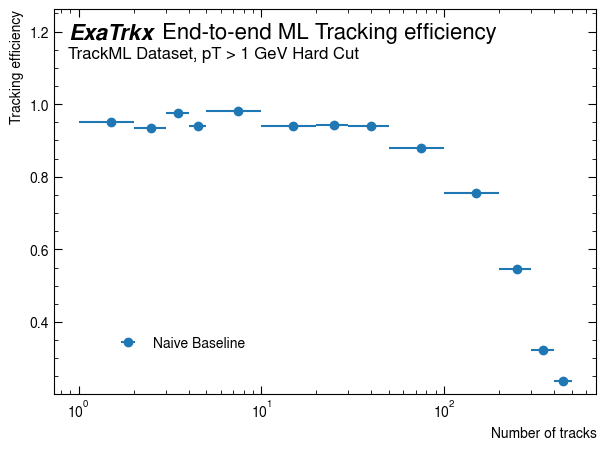

In [101]:
make_figure(input_files = "naive_transformer_trackeff.csv", agg_type = "max", metric_name = "tracking_eff", y_label = "Tracking efficiency", x_label = "Number of tracks", legend_loc = (0.1, 0.1))

(0.05, 1.1)

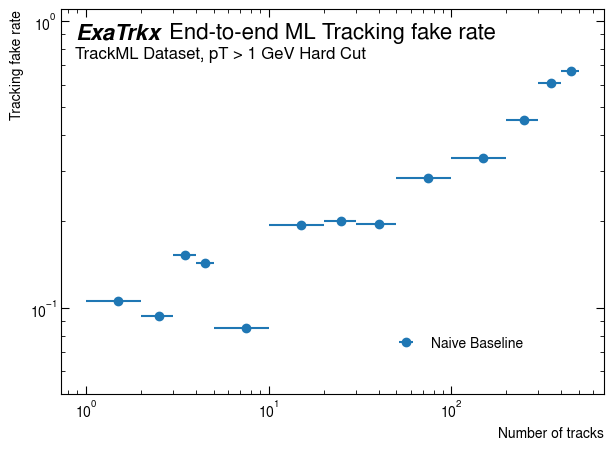

In [102]:
make_figure(input_files = "naive_transformer_trackfakerate.csv", agg_type = "min", metric_name = "tracking_fake_rate", y_label = "Tracking fake rate", x_label = "Number of tracks", legend_loc = (0.6, 0.1))
plt.yscale("log")
plt.ylim(0.05, 1.1)

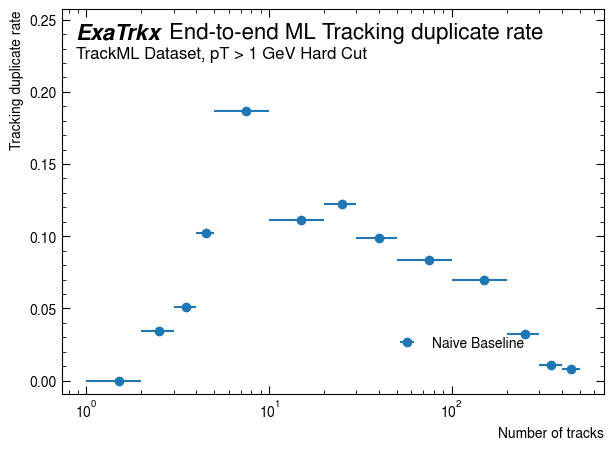

In [103]:
make_figure(input_files = "naive_transformer_trackduprate.csv", agg_type = "max", metric_name = "tracking_dup", y_label = "Tracking duplicate rate", x_label = "Number of tracks", legend_loc = (0.6, 0.1))

## Plots v2

In [186]:
input_dir = "csv"
input_file = "all_runs_2.csv"
data = pd.read_csv(os.path.join(input_dir, input_file))

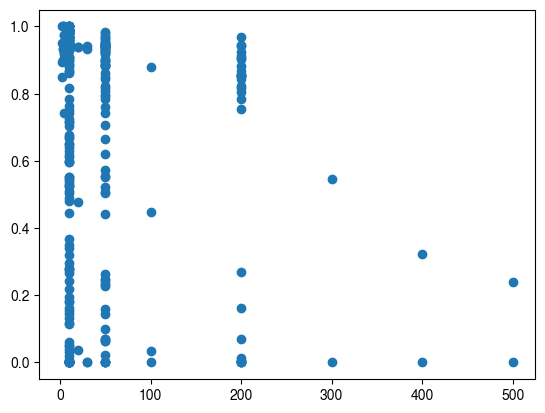

In [112]:
plt.scatter(data["num_tracks"], data["tracking_eff"], label = "Tracking efficiency")

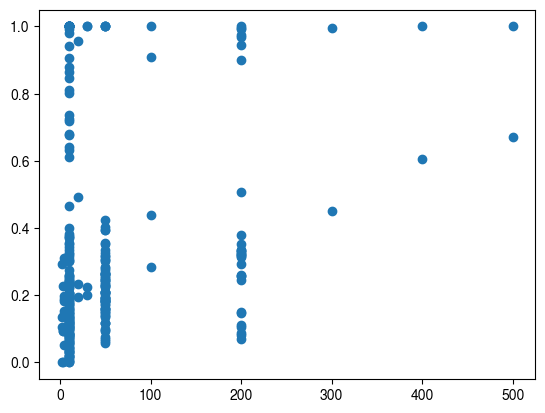

In [113]:
plt.scatter(data["num_tracks"], data["tracking_fake_rate"], label = "Tracking efficiency")

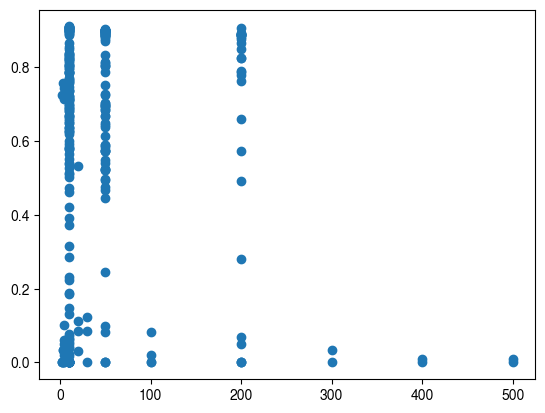

In [115]:
plt.scatter(data["num_tracks"], data["tracking_dup"], label = "Tracking efficiency")

In [132]:
data

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,activation,aggregation,...,train_loss_epoch,train_loss_step,train_user_influencer_loss,train_user_user_loss,trainer/global_step,user_influencer_loss,user_user_loss,val_loss.min,eff_fr_f1,eff_fr_dup_f1
0,clean-energy-92,finished,-,murnanedaniel,NaN,2023-05-06T13:42:09.000Z,479,NaN,ReLU,NaN,...,0.203697,0.052805,NaN,NaN,1599.0,NaN,NaN,0.000259,0.904762,0.874798
1,lunar-wood-37,finished,-,murnanedaniel,NaN,2023-05-06T10:16:04.000Z,163,NaN,SiLU,"[""sum"",""mean"",""max"",""std""]",...,0.696584,0.673325,NaN,NaN,175.0,NaN,NaN,0.531464,0.000934,0.000007
2,elated-terrain-154,finished,-,murnanedaniel,NaN,2023-05-07T11:39:10.000Z,834,NaN,ReLU,NaN,...,NaN,NaN,0.197190,0.0,2399.0,0.203713,0.0,1.211343,NaN,0.000000
3,fresh-galaxy-116,finished,-,murnanedaniel,NaN,2023-05-07T11:38:15.000Z,897,NaN,ReLU,NaN,...,NaN,NaN,0.326058,0.0,2399.0,0.322735,0.0,1.136620,NaN,0.000000
4,trim-voice-91,finished,-,murnanedaniel,NaN,2023-05-06T13:39:30.000Z,5768,NaN,ReLU,NaN,...,NaN,NaN,0.183382,0.0,1599.0,0.185226,0.0,0.718428,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,fast-shadow-388,running,-,murnanedaniel,NaN,2023-05-07T13:10:15.000Z,2313,NaN,ReLU,NaN,...,NaN,NaN,0.407295,NaN,8749.0,NaN,NaN,NaN,NaN,NaN
375,good-rain-380,running,-,murnanedaniel,NaN,2023-05-07T13:10:00.000Z,2333,NaN,ReLU,NaN,...,NaN,NaN,0.266609,NaN,9149.0,NaN,NaN,NaN,NaN,NaN
376,spring-silence-370,running,-,murnanedaniel,NaN,2023-05-07T13:09:58.000Z,2335,NaN,ReLU,NaN,...,NaN,NaN,0.364404,NaN,9149.0,NaN,NaN,NaN,NaN,NaN
377,leafy-glade-365,running,-,murnanedaniel,NaN,2023-05-07T13:09:57.000Z,2340,NaN,ReLU,NaN,...,NaN,NaN,0.319582,NaN,9149.0,NaN,NaN,NaN,NaN,NaN


In [116]:
data["eff_fr_f1"] = 2 * data["tracking_eff"] * (1 - data["tracking_fake_rate"]) / (data["tracking_eff"] + (1 - data["tracking_fake_rate"]))

In [127]:
# Take the f1 mean of the eff, fake rate and the dup rate
data["eff_fr_dup_f1"] = 3 * data["tracking_eff"] * (1 - data["tracking_fake_rate"]) * (1 - data["tracking_dup"]) / (data["tracking_eff"] + (1 - data["tracking_fake_rate"]) + (1 - data["tracking_dup"]))

In [144]:
# For each model, and for each number of tracks, get the best performance in the eff_fr_f1 column
best_data = data.groupby(["model", "num_tracks"])["eff_fr_f1"].idxmax()
best_data = best_data.dropna()
best_data = data.loc[best_data]

In [2]:
# Abstract the plotting into a function
# Function for getting the bin limits
def get_bin_limits(data):
    x_bin_limits = data["num_tracks"].values
    return np.append(1, x_bin_limits)

# Function for getting the bin centers
def get_bin_centers(x_bin_limits):
    return (x_bin_limits[1:] + x_bin_limits[:-1])/2

# Function for getting the error bars
def get_error_bars(x_bin_limits):
    return (x_bin_limits[1:] - x_bin_limits[:-1])/2

def load_data(input_dir = "csv", input_file = "all_runs_1.csv"):
    input_file = os.path.join(input_dir, input_file)
    data = pd.read_csv(input_file)
    return data

def add_f1_column(data):
    data["f1"] = 2 * data["tracking_eff"] * (1 - data["tracking_fake_rate"]) / (data["tracking_eff"] + (1 - data["tracking_fake_rate"]))
    return data

def get_best_data(data):
    best_data = data.groupby(["model", "num_tracks"])["f1"].idxmax()
    best_data = best_data.dropna()
    best_data = data.loc[best_data]
    return best_data

def plot_best_data(best_data, x_bounds = (1, 100)):
    fig, ax = plt.subplots(1, 3, figsize=(24, 5))
    atl.ATLAS = "ExaTrkx"
    
    for i, (metric_name, metric_label) in enumerate(zip(["tracking_eff", "tracking_fake_rate", "tracking_dup"], ["Tracking Efficiency", "Tracking Fake Rate", "Tracking Duplicate Rate"])):
        for model in best_data["model"].unique():
            model_data = best_data[best_data["model"] == model]
            model_data = model_data.sort_values("num_tracks")
            model_data = model_data[model_data["num_tracks"] >= x_bounds[0]]
            model_data = model_data[model_data["num_tracks"] <= x_bounds[1]]
            x_bin_limits = get_bin_limits(model_data)
            x_centers = get_bin_centers(x_bin_limits)
            x_error_bars = get_error_bars(x_bin_limits)
            ax[i].errorbar(
                x_centers,
                model_data[metric_name],
                xerr=x_error_bars,
                fmt="o",
            )
            
        ax[i].set_xscale("log")
        atl.atlasify(f"End-to-end ML {metric_label}", "TrackML Dataset, $pT > 1$ GeV Hard Cut \n Reconstructability (particle and candidate): $n_{hits} > 3$", axes=ax[i])
        ax[i].set_xlabel("Number of tracks")
        ax[i].set_ylabel(metric_label)
        ax[i].legend(best_data["model"].unique(), frameon=False, loc=(0.05, 0.3))

    return fig, ax

def make_figure(input_dir = "csv", input_file = "all_runs_1.csv", x_bounds = (1, 100)):
    data = load_data(input_dir, input_file)
    data = add_f1_column(data)
    best_data = get_best_data(data)
    return plot_best_data(best_data, x_bounds)

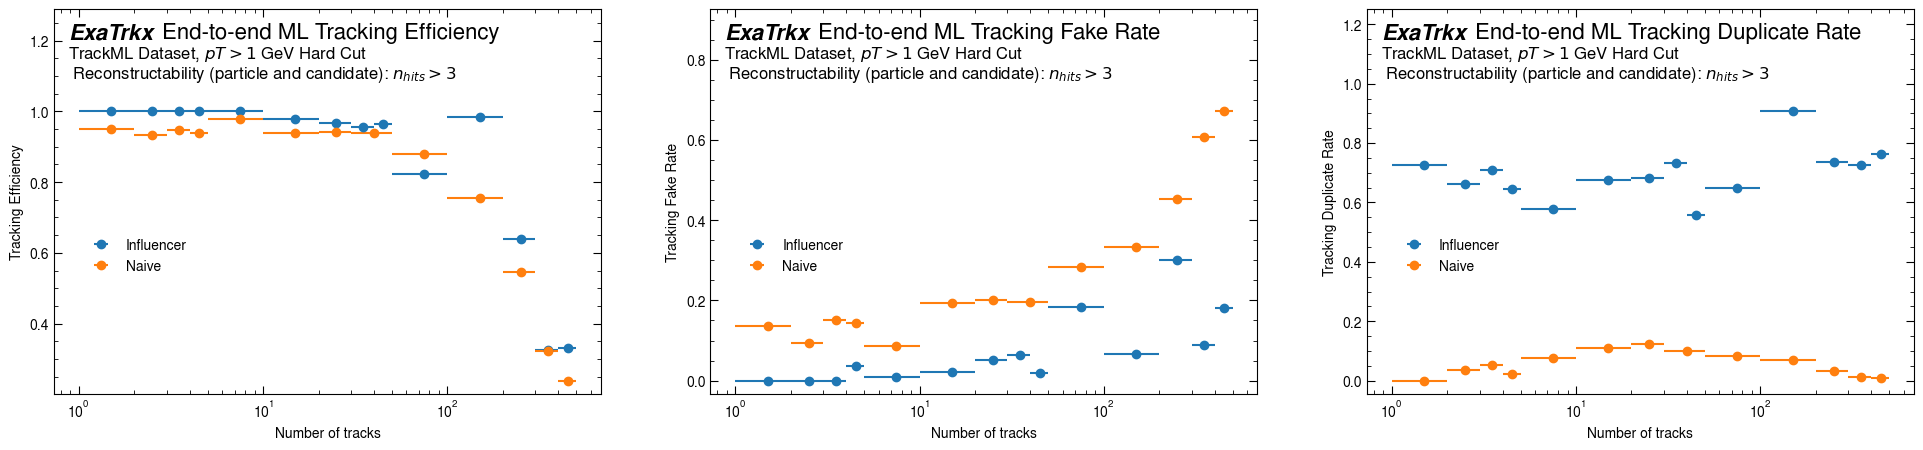

In [38]:
make_figure(input_file="all_runs_2.csv", x_bounds=(1, 1000))

(-0.02, 0.6)

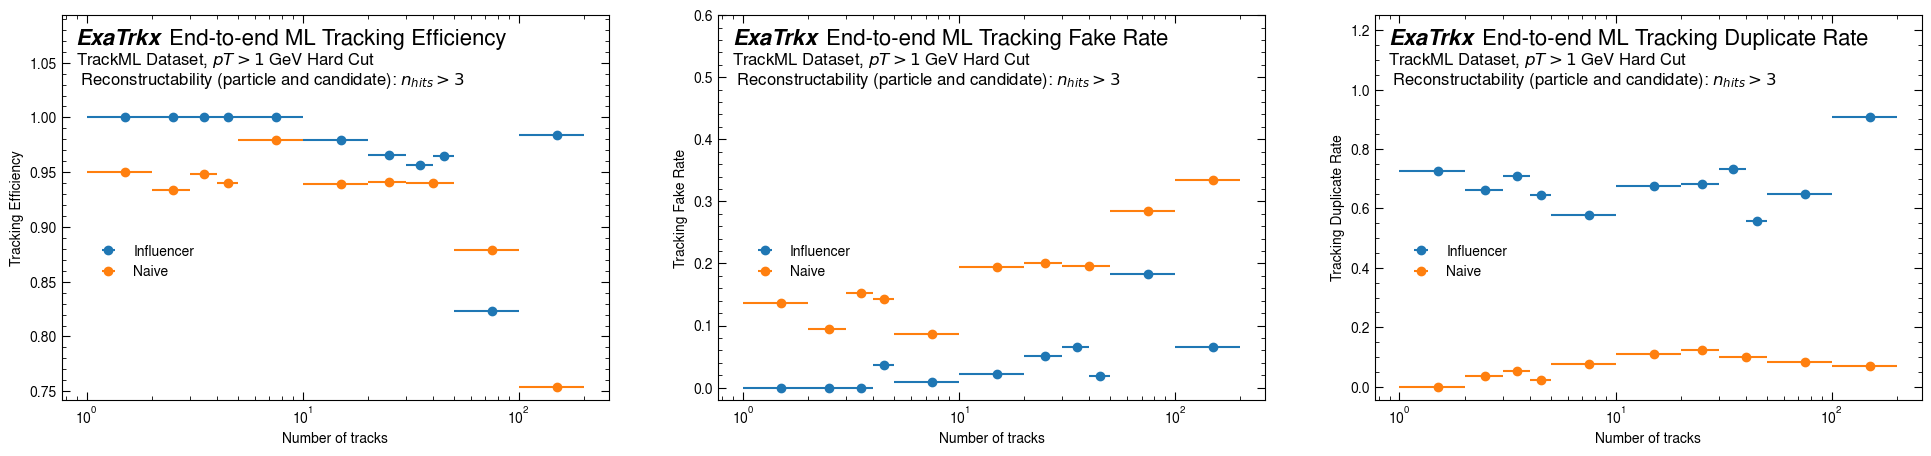

In [48]:
fig, ax = make_figure(input_file="all_runs_2.csv", x_bounds=(1, 200))
ax[1].set_ylim(-0.02, 0.6)

(-0.02, 0.6)

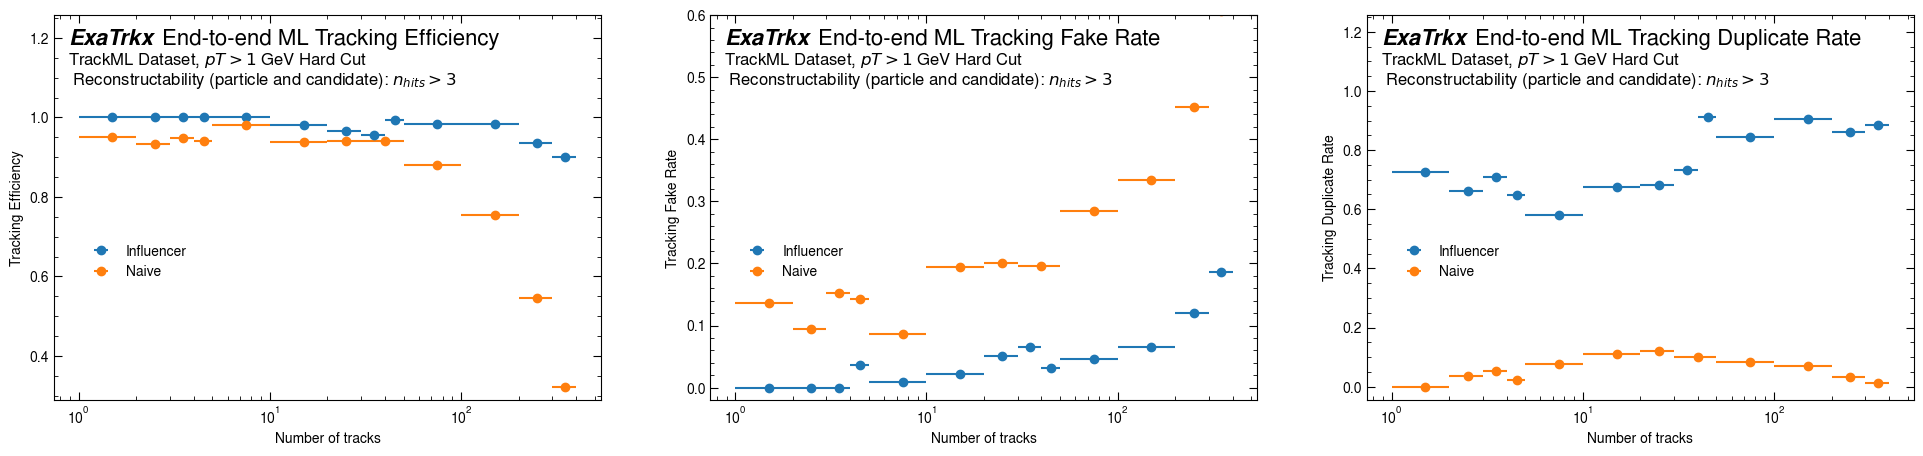

In [7]:
fig, ax = make_figure(input_file="all_runs_3.csv", x_bounds=(1, 400))
ax[1].set_ylim(-0.02, 0.6)

## Computational Scaling Performance 

In [226]:
input_dir = "csv"
input_file = "all_runs_2.csv"
data = pd.read_csv(os.path.join(input_dir, input_file))
data = data.dropna(subset=["model"])

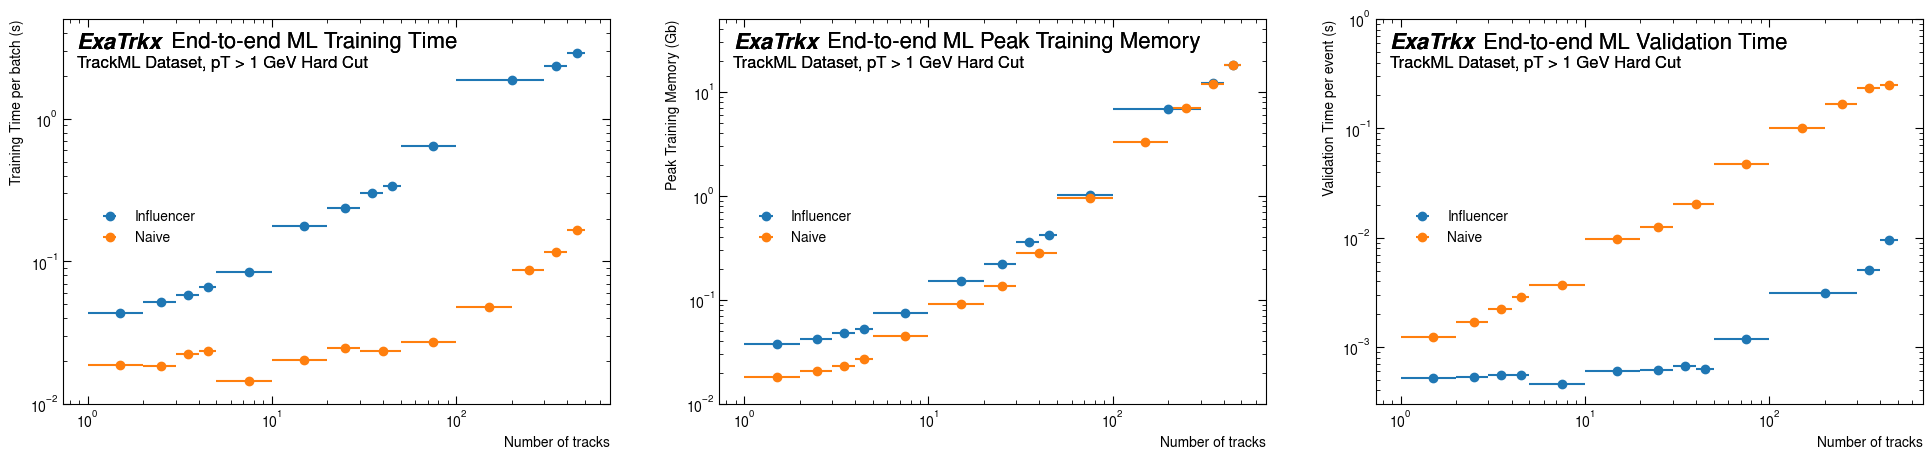

In [243]:
# Plot training time vs number of tracks for each model
fig, ax = plt.subplots(1, 3, figsize=(24, 5))
for model in data["model"].unique():
    model_data = data[(data["model"] == model) & (data.batch_size == 10)]
    model_data = model_data.groupby("num_tracks")[["stats/training_time", "stats/training_max_memory", "stats/validation_time"]].min()
    model_data["stats/validation_time"] = model_data["stats/validation_time"] / 10
    model_data = model_data.dropna()
    x_bin_limits = model_data.index.values
    x_bin_limits = np.append(1, x_bin_limits)
    x_centers = (x_bin_limits[1:] + x_bin_limits[:-1])/2
    x_error_bars = (x_bin_limits[1:] - x_bin_limits[:-1])/2
    # for i, (metric_name, metric_label) in enumerate(zip(["stats/training_time", "stats/training_max_memory", "stats/validation_time"], ["Training Time per batch (s)", "Peak Training Memory (Gb)", "Validation Time per event (s)"])):
    for i, (metric_name, metric_label, units) in enumerate(zip(["stats/training_time", "stats/training_max_memory", "stats/validation_time"], ["Training Time", "Peak Training Memory", "Validation Time"], ["per batch (s)", "(Gb)", "per event (s)"])):
        ax[i].errorbar(
            x_centers,
            model_data[metric_name],
            xerr=x_error_bars,
            fmt="o",
        )
        ax[i].set_xscale("log")
        ax[i].set_xlabel("Number of tracks")
        ax[i].set_ylabel(f"{metric_label} {units}")
        ax[i].legend(data["model"].unique(), frameon=False, loc=(0.05, 0.4))
        ax[i].set_yscale("log")
        atl.atlasify(f"End-to-end ML {metric_label}", "TrackML Dataset, pT > 1 GeV Hard Cut", axes=ax[i])
    ax[0].set_ylim(1e-2, 5)
    ax[1].set_ylim(1e-2, 50)
    ax[2].set_ylim(3e-4, 1)

In [206]:
data[data.model == "Naive"].groupby("num_tracks")[["stats/training_time", "stats/training_max_memory", "stats/validation_time"]].min()

,stats/training_time,stats/training_max_memory,stats/validation_time
num_tracks,,,
2.0,0.018735,0.018149,0.012465
3.0,0.018561,0.020879,0.016858
4.0,0.022591,0.023444,0.022381
5.0,0.023424,0.027216,0.028747
10.0,0.008467,0.021102,0.008545
20.0,0.020292,0.091349,0.097065
30.0,0.024772,0.137648,0.125731
50.0,0.023636,0.283495,0.201274
100.0,0.027106,0.953601,0.474129


In [211]:
data[(data.model == "Influencer") & (data.batch_size == 10)].groupby("num_tracks")[["stats/training_time", "stats/training_max_memory", "stats/validation_time"]].min()

,stats/training_time,stats/training_max_memory,stats/validation_time
num_tracks,,,
2.0,0.043608,0.037839,0.005233
3.0,0.051831,0.042203,0.005365
4.0,0.058517,0.047829,0.005511
5.0,0.066204,0.052422,0.005513
10.0,0.084300,0.074938,0.004581
20.0,0.176639,0.152055,0.005989
30.0,0.236283,0.223192,0.006115
40.0,0.300768,0.363924,0.006749
50.0,0.339873,0.421029,0.006257


In [220]:
model_data = data[(data.model == "Naive") & (data.batch_size == 10)].groupby("num_tracks")[["stats/training_time", "stats/training_max_memory", "stats/validation_time"]].min()

In [221]:
model_data["stats/validation_time"] = model_data["stats/validation_time"] / 10

In [210]:
data.batch_size

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
418    10.0
419    10.0
420    10.0
421    10.0
422     NaN
Name: batch_size, Length: 423, dtype: float64